
========= RESULTS =========
Theta (radians): 0.5163082875193942
Theta (degrees): 29.58228580248832
M: -0.04999999973527115
X: 55.013459364279996

Mean L1 Error per point: 25.4014


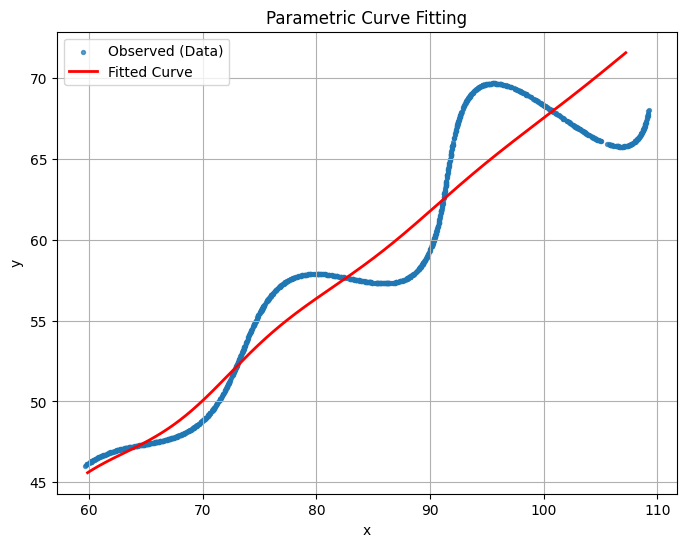

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

data = pd.read_csv('xy_data.csv')

x_obs = data['x'].values
y_obs = data['y'].values

if 't' in data.columns:
    t = data['t'].values
else:
    n = len(data)
    t = np.linspace(6, 60, n)

def parametric_model(params, t):
    theta, M, X = params
    exp_term = np.exp(M * np.abs(t))
    sin03t = np.sin(0.3 * t)
    x = t * np.cos(theta) - exp_term * sin03t * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + exp_term * sin03t * np.cos(theta)
    return x, y

def residuals(params):
    x_pred, y_pred = parametric_model(params, t)
    return np.concatenate([(x_pred - x_obs), (y_pred - y_obs)])

lb = [0.0, -0.05, 0.0]
ub = [np.deg2rad(50), 0.05, 100.0]
initial_guess = [np.deg2rad(25), 0.0, 50.0]

result = least_squares(residuals, initial_guess, bounds=(lb, ub), max_nfev=20000)
theta, M, X = result.x

x_fit, y_fit = parametric_model([theta, M, X], t)
L1_error = np.mean(np.abs(x_fit - x_obs) + np.abs(y_fit - y_obs))

print("\n========= RESULTS =========")
print(f"Theta (radians): {theta}")
print(f"Theta (degrees): {np.rad2deg(theta)}")
print(f"M: {M}")
print(f"X: {X}")
print(f"\nMean L1 Error per point: {L1_error:.4f}")
print("=============================")

plt.figure(figsize=(8,6))
plt.scatter(x_obs, y_obs, s=8, alpha=0.7, label='Observed (Data)')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve', linewidth=2)
plt.title("Parametric Curve Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
